### Computer Vision - Task 1

#### 1.a.) Take any 3 images of your own. Write a code to reshape it to n*n dimensions and apply Canny, Sobel Operator using Python OpenCV. (4)
#### b.) Write a detailed Comparison of the results for each technique by considering aspects such as edge localization, noise sensitivity, etc. Discuss the strength and limitations of each technique based on your observations. (6).

In [6]:
#Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def show(img, title="", cmap=None):
    plt.figure(figsize=(4,4))
    if cmap is None and len(img.shape) == 3:
        #Convert BGR (Opencv default) to RGB for proper display
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(img, cmap=cmap if cmap else "gray")
    plt.title(title)
    plt.axis("off")
    plt.show()

In [10]:
#Loading 3 images
img1 = cv2.imread("Dubai_burj.webp")
img2 = cv2.imread("Faroe_islands.jpg")
img3 = cv2.imread("Masai_mara.webp")

#img check
for i, img in enumerate([img1, img2, img3], start=1):
    if img is None:
        print(f"Image {i} failed to load. Please check the path.")
    else:
        print(f"Image {i} Loaded successfully. Shape: {img.shape}")

Image 1 Loaded successfully. Shape: (667, 500, 3)
Image 2 Loaded successfully. Shape: (1200, 1920, 3)
Image 3 Loaded successfully. Shape: (335, 500, 3)


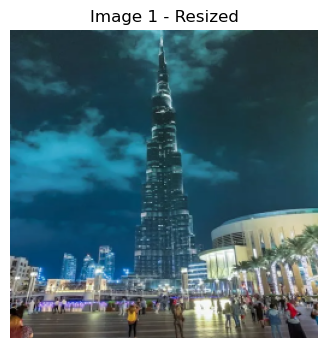

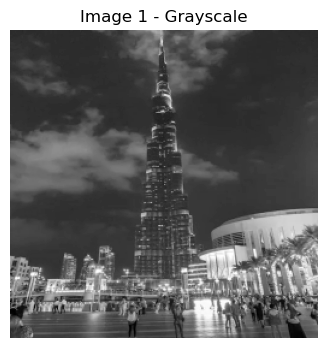

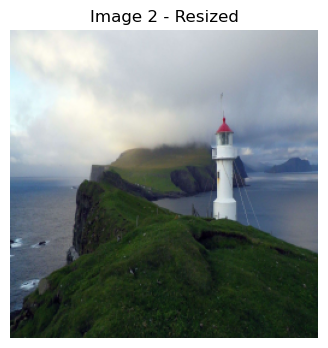

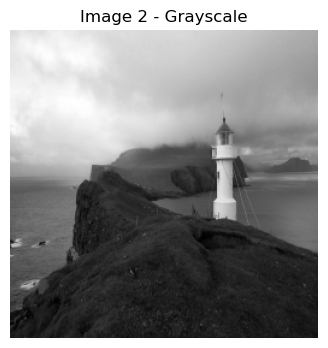

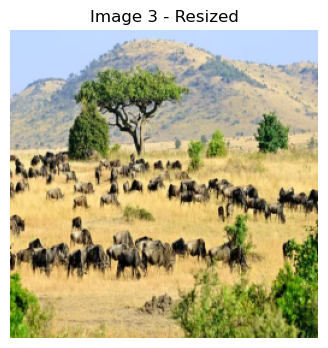

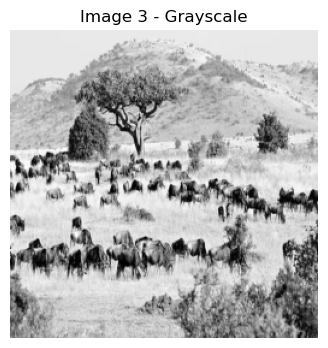

In [39]:
#Resize image to n*n and converting to grayscale
n = 256

resized_gray =[]
for i, img in enumerate([img1, img2, img3], start=1):
    if img is not None:
        #Resize
        img_resized = cv2.resize(img, (n, n), interpolation=cv2.INTER_AREA)
        #Convert to grayscale
        gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
        resized_gray.append((img_resized, gray))

        show(img_resized, title=f"Image {i} - Resized")
        show(gray, title=f"Image {i} - Grayscale", cmap="gray")

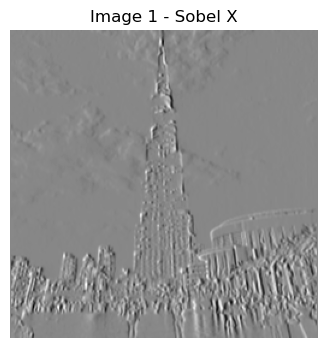

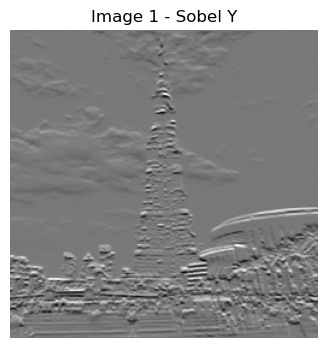

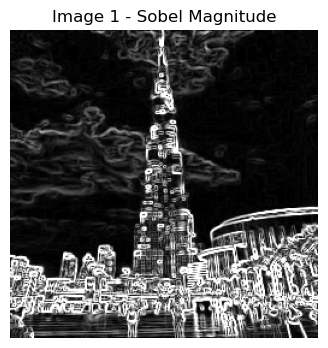

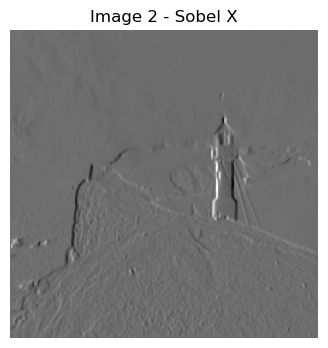

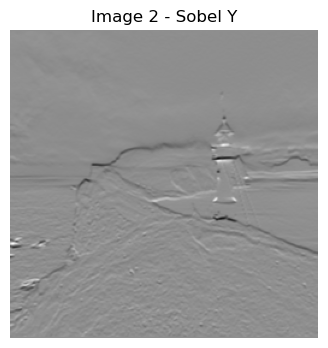

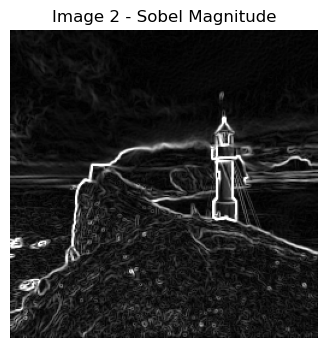

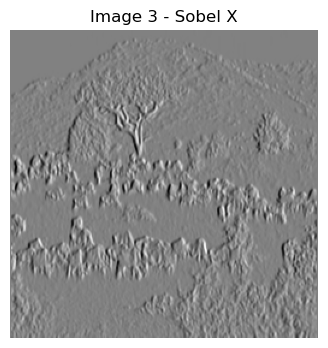

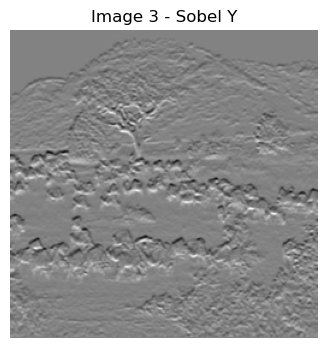

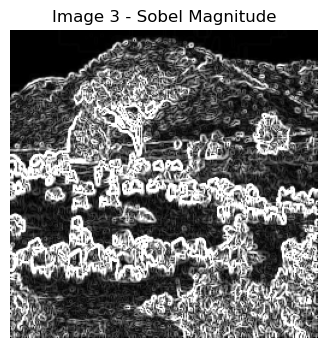

In [41]:
# Apply Sobel operator (X, Y and combined magitude)
sobel_results = []

for i, (_, gray) in enumerate(resized_gray, start=1):
    #Sobel in X direction
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    #Sobel in Y direction
    sobely =  cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

    #Gradient magnitude
    sobel_mag = cv2.magnitude(sobelx, sobely)
    sobel_mag = cv2.convertScaleAbs(sobel_mag) #Convert to 8-bit for display

    sobel_results.append((sobelx, sobely, sobel_mag))

    #Show results
    show(sobelx, title=f"Image {i} - Sobel X", cmap="gray")
    show(sobely, title=f"Image {i} - Sobel Y", cmap="gray")
    show(sobel_mag, title=f"Image {i} - Sobel Magnitude", cmap="gray")

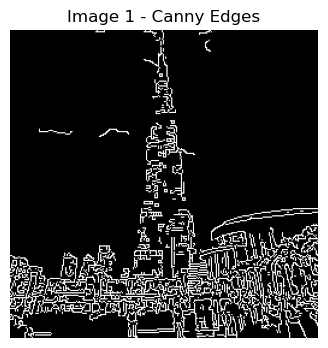

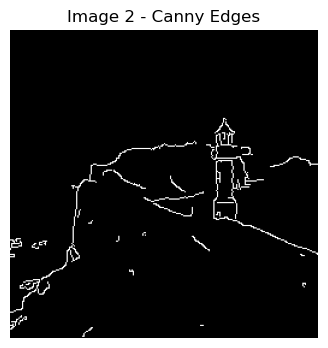

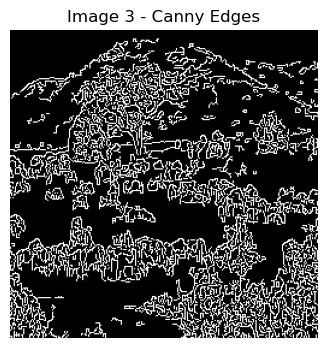

In [43]:
# Apply Canny edge detection
canny_results = []

for i, (_, gray) in enumerate(resized_gray, start=1):
    #Apply Canny with chosen thresholds
    canny_edges = cv2.Canny(gray, threshold1=100, threshold2=200)
    canny_results.append(canny_edges)

    #Show results
    show(canny_edges, title=f"Image {i} - Canny Edges", cmap="gray")

## Comparison of Sobel and Canny Edge Detection

### 1. Edge Localization
- **Sobel**: Produces thicker edges since it directly computes gradients in X and Y directions. Localization is moderate, and edges may appear blurred or less precise.
- **Canny**: Provides thin, well-localized edges due to non-maximum suppression. It detects boundaries more accurately, especially in complex images.

### 2. Noise Sensitivity
- **Sobel**: Sensitive to noise because it lacks a smoothing step. Textured or noisy regions often produce spurious edges.
- **Canny**: Includes Gaussian smoothing before edge detection, making it more robust to noise. Weak edges are suppressed using hysteresis thresholding.

### 3. Computational Complexity
- **Sobel**: Simple and fast to compute. Useful for quick gradient analysis or as a preprocessing step.
- **Canny**: Multi-stage process (smoothing, gradient, suppression, thresholding). More computationally expensive but yields cleaner results.

### 4. Strengths and Limitations
- **Sobel Strengths**:
  - Fast and lightweight.
  - Provides directional gradients (Gx, Gy) useful for feature extraction.
- **Sobel Limitations**:
  - Poor noise handling.
  - Produces thicker, less precise edges.
- **Canny Strengths**:
  - Superior edge localization.
  - Robust to noise and produces continuous, thin edges.
- **Canny Limitations**:
  - Requires careful tuning of thresholds.
  - Computationally heavier.

### 5. Observations from Our Images
- In high-contrast regions, Sobel detects dominant edges but merges fine details.
- Canny preserves fine structures and suppresses spurious edges, giving cleaner boundaries.
- Sobel is useful for quick gradient visualization, while Canny is better for accurate edge maps.

---

**Conclusion:**  
Sobel is a simple gradient-based operator that quickly highlights edges but is prone to noise and produces thicker boundaries. Canny, with its multi-stage pipeline, achieves sharper, noise-resistant edges and is preferred for tasks requiring precise edge detection. The choice depends on whether speed (Sobel) or accuracy (Canny) is more critical for the application.
